In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
os.chdir('/Users/user/Desktop/KAGGLEE-SERIOUS')

In [4]:
airtel=pd.read_csv('churn-in-telecoms-dataset.zip')

In [5]:
airtel.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [4]:
airtel.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


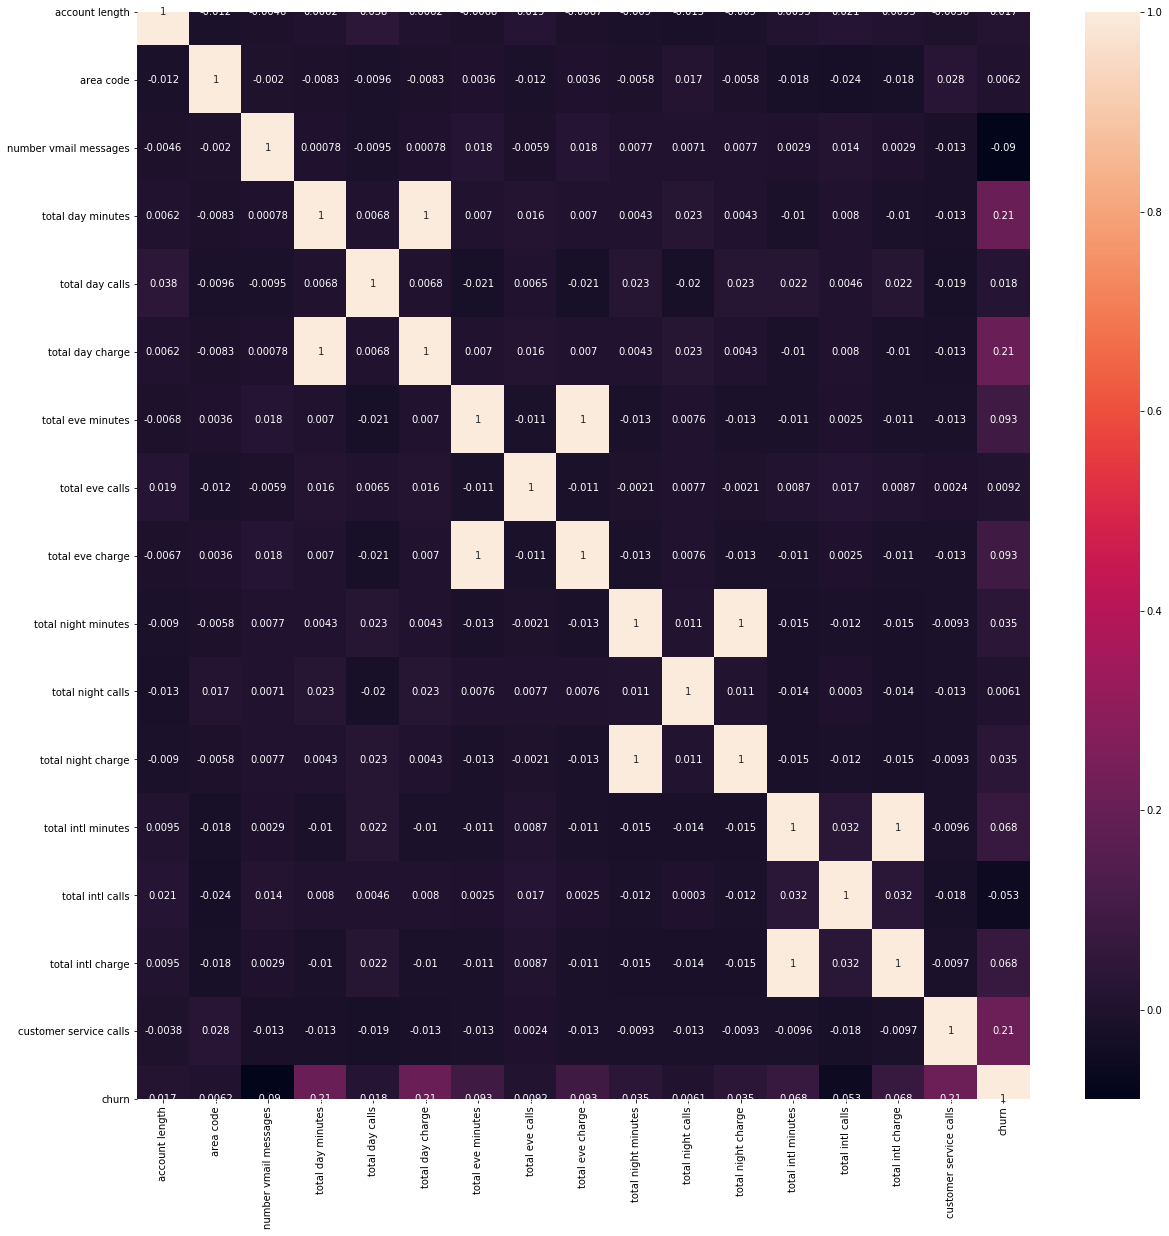

In [5]:

plt.figure(figsize=(20,20))
sns.heatmap(airtel.corr(),annot=True)
#plt.fitsize=(20,20)#annot=true

In [6]:
a1=airtel.drop('phone number',axis=1)  #do not do like this
a1

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [7]:
airtel.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
airtel.drop('phone number',axis=1,inplace=True)

In [10]:
airtel.drop(["total day minutes","total eve minutes","total night minutes","total intl minutes"],axis=1,inplace=True)

In [11]:
airtel.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [12]:
airtel.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

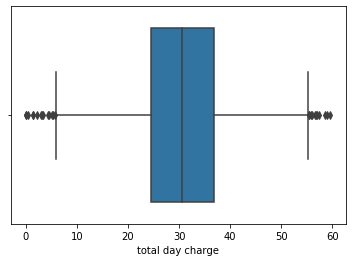

In [13]:
sns.boxplot(airtel['total day charge'])

In [14]:
airtel.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [15]:
airtel.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [16]:
airtel[['churn','state','international plan','voice mail plan']]=airtel[['churn','state','international plan','voice mail plan']].astype('category')

In [17]:
airtel.dtypes

state                     category
account length               int64
area code                    int64
international plan        category
voice mail plan           category
number vmail messages        int64
total day calls              int64
total day charge           float64
total eve calls              int64
total eve charge           float64
total night calls            int64
total night charge         float64
total intl calls             int64
total intl charge          float64
customer service calls       int64
churn                     category
dtype: object

In [21]:
x=pd.DataFrame(airtel.iloc[:,:15])
y=pd.DataFrame(airtel.iloc[:,15:])


In [22]:
x

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2
3329,WV,68,415,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3
3330,RI,28,510,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2
3331,CT,184,510,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2


In [23]:
y


,churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


In [24]:
airtel.dtypes

state                     category
account length               int64
area code                    int64
international plan        category
voice mail plan           category
number vmail messages        int64
total day calls              int64
total day charge           float64
total eve calls              int64
total eve charge           float64
total night calls            int64
total night charge         float64
total intl calls             int64
total intl charge          float64
customer service calls       int64
churn                     category
dtype: object

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [26]:
x_train.dtypes

state                     category
account length               int64
area code                    int64
international plan        category
voice mail plan           category
number vmail messages        int64
total day calls              int64
total day charge           float64
total eve calls              int64
total eve charge           float64
total night calls            int64
total night charge         float64
total intl calls             int64
total intl charge          float64
customer service calls       int64
dtype: object

In [27]:
y_train.dtypes

churn    category
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
x_train['state']=x_train['state'].cat.codes
x_test['state']=x_test['state'].cat.codes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
x_train.dtypes

state                         int8
account length               int64
area code                    int64
international plan        category
voice mail plan           category
number vmail messages        int64
total day calls              int64
total day charge           float64
total eve calls              int64
total eve charge           float64
total night calls            int64
total night charge         float64
total intl calls             int64
total intl charge          float64
customer service calls       int64
dtype: object

In [31]:
cat_tr=x_train[['international plan','voice mail plan']]

In [32]:
cat_test=x_test[['international plan','voice mail plan']]

In [33]:
x_train

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
2046,46,120,415,no,no,0,98,25.36,88,16.46,119,11.20,5,3.00,1
747,17,155,510,no,no,0,102,31.38,117,16.66,122,10.19,1,2.11,1
180,49,94,510,yes,yes,23,125,33.51,136,18.23,103,12.70,5,2.57,4
2968,6,160,415,no,no,0,136,39.93,134,23.02,101,9.87,2,3.75,1
534,18,67,510,no,no,0,97,52.77,123,5.65,99,11.09,10,2.48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,13,127,408,no,no,0,128,17.48,95,12.21,97,8.61,5,2.70,1
3325,35,78,408,no,no,0,99,32.88,88,9.94,109,10.95,4,2.51,2
1414,45,182,415,no,no,0,90,29.94,106,14.87,134,10.56,4,2.62,1
1691,37,95,415,no,no,0,120,45.73,120,19.86,61,8.07,4,1.97,2


In [34]:
x_test

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
221,42,127,408,no,yes,22,114,28.22,103,14.83,68,11.02,6,2.75,1
1313,6,100,415,no,no,0,130,40.09,69,14.96,122,2.86,1,1.97,2
1635,3,66,510,no,no,0,133,26.18,121,16.91,100,6.84,3,2.57,4
289,36,89,510,no,no,0,95,51.66,114,22.18,89,14.04,3,1.43,1
2416,12,113,510,no,no,0,141,26.52,72,21.83,123,7.89,5,3.21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,15,131,408,no,no,0,108,40.95,91,14.23,109,14.50,8,3.97,3
1533,50,127,510,yes,no,0,102,41.17,80,19.22,96,11.34,5,3.75,2
1762,11,146,510,no,no,0,77,32.18,128,13.25,83,8.37,3,2.00,0
1145,13,31,415,no,no,0,129,30.14,105,12.99,92,7.33,2,1.38,0


In [43]:
x_test.drop(['international plan','voice mail plan'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
x_train.drop(['international plan','voice mail plan'],axis=1,inplace=True)

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
OHE=OneHotEncoder()
cat_tr=OHE.fit_transform(cat_tr).toarray()
cat_test=OHE.fit_transform(cat_test).toarray()

In [38]:
xtrain=pd.concat([x_train.reset_index(drop=True),pd.DataFrame(cat_tr).reset_index(drop=True)],axis=1)
xtest=pd.concat([x_test.reset_index(drop=True),pd.DataFrame(cat_test).reset_index(drop=True)],axis=1)

In [39]:
xtrain.shape,xtest.shape

((2666, 19), (667, 19))

In [40]:
xtrain

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,0,1,2,3
0,46,120,415,no,no,0,98,25.36,88,16.46,119,11.20,5,3.00,1,1.0,0.0,1.0,0.0
1,17,155,510,no,no,0,102,31.38,117,16.66,122,10.19,1,2.11,1,1.0,0.0,1.0,0.0
2,49,94,510,yes,yes,23,125,33.51,136,18.23,103,12.70,5,2.57,4,0.0,1.0,0.0,1.0
3,6,160,415,no,no,0,136,39.93,134,23.02,101,9.87,2,3.75,1,1.0,0.0,1.0,0.0
4,18,67,510,no,no,0,97,52.77,123,5.65,99,11.09,10,2.48,4,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,13,127,408,no,no,0,128,17.48,95,12.21,97,8.61,5,2.70,1,1.0,0.0,1.0,0.0
2662,35,78,408,no,no,0,99,32.88,88,9.94,109,10.95,4,2.51,2,1.0,0.0,1.0,0.0
2663,45,182,415,no,no,0,90,29.94,106,14.87,134,10.56,4,2.62,1,1.0,0.0,1.0,0.0
2664,37,95,415,no,no,0,120,45.73,120,19.86,61,8.07,4,1.97,2,1.0,0.0,1.0,0.0


In [41]:
xtest

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,0,1,2,3
0,42,127,408,no,yes,22,114,28.22,103,14.83,68,11.02,6,2.75,1,1.0,0.0,0.0,1.0
1,6,100,415,no,no,0,130,40.09,69,14.96,122,2.86,1,1.97,2,1.0,0.0,1.0,0.0
2,3,66,510,no,no,0,133,26.18,121,16.91,100,6.84,3,2.57,4,1.0,0.0,1.0,0.0
3,36,89,510,no,no,0,95,51.66,114,22.18,89,14.04,3,1.43,1,1.0,0.0,1.0,0.0
4,12,113,510,no,no,0,141,26.52,72,21.83,123,7.89,5,3.21,2,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,15,131,408,no,no,0,108,40.95,91,14.23,109,14.50,8,3.97,3,1.0,0.0,1.0,0.0
663,50,127,510,yes,no,0,102,41.17,80,19.22,96,11.34,5,3.75,2,0.0,1.0,1.0,0.0
664,11,146,510,no,no,0,77,32.18,128,13.25,83,8.37,3,2.00,0,1.0,0.0,1.0,0.0
665,13,31,415,no,no,0,129,30.14,105,12.99,92,7.33,2,1.38,0,1.0,0.0,1.0,0.0


In [45]:
xtrain.drop('area code',axis=1,inplace=True) 
xtrain

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,0,1,2,3
0,46,120,no,no,0,98,25.36,88,16.46,119,11.20,5,3.00,1,1.0,0.0,1.0,0.0
1,17,155,no,no,0,102,31.38,117,16.66,122,10.19,1,2.11,1,1.0,0.0,1.0,0.0
2,49,94,yes,yes,23,125,33.51,136,18.23,103,12.70,5,2.57,4,0.0,1.0,0.0,1.0
3,6,160,no,no,0,136,39.93,134,23.02,101,9.87,2,3.75,1,1.0,0.0,1.0,0.0
4,18,67,no,no,0,97,52.77,123,5.65,99,11.09,10,2.48,4,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,13,127,no,no,0,128,17.48,95,12.21,97,8.61,5,2.70,1,1.0,0.0,1.0,0.0
2662,35,78,no,no,0,99,32.88,88,9.94,109,10.95,4,2.51,2,1.0,0.0,1.0,0.0
2663,45,182,no,no,0,90,29.94,106,14.87,134,10.56,4,2.62,1,1.0,0.0,1.0,0.0
2664,37,95,no,no,0,120,45.73,120,19.86,61,8.07,4,1.97,2,1.0,0.0,1.0,0.0


In [46]:
xtest.drop('area code',axis=1,inplace=True)
xtest

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,0,1,2,3
0,42,127,no,yes,22,114,28.22,103,14.83,68,11.02,6,2.75,1,1.0,0.0,0.0,1.0
1,6,100,no,no,0,130,40.09,69,14.96,122,2.86,1,1.97,2,1.0,0.0,1.0,0.0
2,3,66,no,no,0,133,26.18,121,16.91,100,6.84,3,2.57,4,1.0,0.0,1.0,0.0
3,36,89,no,no,0,95,51.66,114,22.18,89,14.04,3,1.43,1,1.0,0.0,1.0,0.0
4,12,113,no,no,0,141,26.52,72,21.83,123,7.89,5,3.21,2,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,15,131,no,no,0,108,40.95,91,14.23,109,14.50,8,3.97,3,1.0,0.0,1.0,0.0
663,50,127,yes,no,0,102,41.17,80,19.22,96,11.34,5,3.75,2,0.0,1.0,1.0,0.0
664,11,146,no,no,0,77,32.18,128,13.25,83,8.37,3,2.00,0,1.0,0.0,1.0,0.0
665,13,31,no,no,0,129,30.14,105,12.99,92,7.33,2,1.38,0,1.0,0.0,1.0,0.0


In [50]:
xtest.drop(['international plan','voice mail plan'],axis=1,inplace=True)

In [51]:
xtrain.drop(['international plan','voice mail plan'],axis=1,inplace=True)

In [49]:
xtrain

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,0,1,2,3
0,46,120,no,no,0,98,25.36,88,16.46,119,11.20,5,3.00,1,1.0,0.0,1.0,0.0
1,17,155,no,no,0,102,31.38,117,16.66,122,10.19,1,2.11,1,1.0,0.0,1.0,0.0
2,49,94,yes,yes,23,125,33.51,136,18.23,103,12.70,5,2.57,4,0.0,1.0,0.0,1.0
3,6,160,no,no,0,136,39.93,134,23.02,101,9.87,2,3.75,1,1.0,0.0,1.0,0.0
4,18,67,no,no,0,97,52.77,123,5.65,99,11.09,10,2.48,4,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,13,127,no,no,0,128,17.48,95,12.21,97,8.61,5,2.70,1,1.0,0.0,1.0,0.0
2662,35,78,no,no,0,99,32.88,88,9.94,109,10.95,4,2.51,2,1.0,0.0,1.0,0.0
2663,45,182,no,no,0,90,29.94,106,14.87,134,10.56,4,2.62,1,1.0,0.0,1.0,0.0
2664,37,95,no,no,0,120,45.73,120,19.86,61,8.07,4,1.97,2,1.0,0.0,1.0,0.0


In [52]:
xtest

,state,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,0,1,2,3
0,42,127,22,114,28.22,103,14.83,68,11.02,6,2.75,1,1.0,0.0,0.0,1.0
1,6,100,0,130,40.09,69,14.96,122,2.86,1,1.97,2,1.0,0.0,1.0,0.0
2,3,66,0,133,26.18,121,16.91,100,6.84,3,2.57,4,1.0,0.0,1.0,0.0
3,36,89,0,95,51.66,114,22.18,89,14.04,3,1.43,1,1.0,0.0,1.0,0.0
4,12,113,0,141,26.52,72,21.83,123,7.89,5,3.21,2,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,15,131,0,108,40.95,91,14.23,109,14.50,8,3.97,3,1.0,0.0,1.0,0.0
663,50,127,0,102,41.17,80,19.22,96,11.34,5,3.75,2,0.0,1.0,1.0,0.0
664,11,146,0,77,32.18,128,13.25,83,8.37,3,2.00,0,1.0,0.0,1.0,0.0
665,13,31,0,129,30.14,105,12.99,92,7.33,2,1.38,0,1.0,0.0,1.0,0.0


In [53]:
xtest.shape,xtrain.shape

((667, 16), (2666, 16))

In [48]:
y_train.dtypes

churn    category
dtype: object

In [54]:
y_train['churn']=y_train['churn'].astype('bool')
y_test['churn']=y_test['churn'].astype('bool')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
y_train.dtypes
y_test.dtypes

churn    bool
dtype: object

In [ ]:
y_train

In [ ]:
y_test

In [56]:
y_train[y_train["churn"] == True]=1
y_train[y_train["churn"] == False]=0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [57]:
y_test[y_test["churn"] == True]=1
y_test[y_test["churn"] == False]=0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
y_train

,churn
2046,0
747,0
180,0
2968,1
534,0
...,...
3313,0
3325,0
1414,0
1691,1


In [59]:
y_test.head(20)

,churn
221,0
1313,0
1635,1
289,1
2416,0
3112,1
601,1
326,0
2783,0
454,1


# NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb=GaussianNB()

In [62]:
naiv=gnb.fit(xtrain,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
y_train_pred_N=naiv.predict(xtrain)
y_test_pred_N=naiv.predict(xtest)

In [88]:
y_train_pred_N

array([0, 0, 1, ..., 0, 0, 1])

In [85]:
#y_train_pred_N=gnb.predict(xtrain)

In [86]:
#y_train_pred_N

array([0, 0, 1, ..., 0, 0, 1])

In [64]:
#nb.score(y_test,y_test_pred_N)*100
from sklearn.metrics import accuracy_score

In [65]:
y_test.shape,y_test_pred_N.shape

((667, 1), (667,))

In [66]:
accuracy_score(y_test_pred_N,y_test)

0.8545727136431784

In [67]:
print(classification_report(y_test,y_test_pred_N))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       574
           1       0.48      0.42      0.45        93

    accuracy                           0.85       667
   macro avg       0.69      0.67      0.68       667
weighted avg       0.85      0.85      0.85       667



In [68]:
print(classification_report(y_train,y_train_pred_N))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2276
           1       0.45      0.36      0.40       390

    accuracy                           0.84      2666
   macro avg       0.67      0.64      0.66      2666
weighted avg       0.83      0.84      0.84      2666



In [69]:
accuracy_score(y_train,y_train_pred_N)

0.8428357089272318

In [70]:
xtest.isnull().sum()

state                     0
account length            0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
0                         0
1                         0
2                         0
3                         0
dtype: int64

# LOGISTIC

In [71]:
logistic=LogisticRegression()
logistic.fit(xtrain,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
ytest_pred=logistic.predict(xtest)

In [73]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(xtest, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [74]:
accuracy_score(y_test,ytest_pred)*100

86.65667166416792

In [75]:
conf_train=confusion_matrix(y_test,ytest_pred)
conf_train

array([[564,  10],
       [ 79,  14]])

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       574
           1       0.58      0.15      0.24        93

    accuracy                           0.87       667
   macro avg       0.73      0.57      0.58       667
weighted avg       0.84      0.87      0.83       667



In [77]:
y_trainpred=logistic.predict(xtrain)

In [78]:
accuracy_score(y_train,y_trainpred)*100

86.12153038259565

In [79]:
conf_train=confusion_matrix(y_train,y_trainpred)
conf_train

array([[2223,   53],
       [ 317,   73]])

In [80]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2276
           1       0.58      0.19      0.28       390

    accuracy                           0.86      2666
   macro avg       0.73      0.58      0.60      2666
weighted avg       0.83      0.86      0.83      2666



In [ ]:
from sklearn.model_selection import KFold 

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val_score_train=cross_val_score(logistic,xtrain,y_train,cv=10,scoring='accuracy')
print(cross_val_score_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_

[0.87265918 0.85018727 0.85393258 0.87265918 0.86891386 0.8576779
 0.86466165 0.84962406 0.85338346 0.87593985]


In [89]:
cross_val_score_train=cross_val_score(gnb,xtrain,y_train,cv=10,scoring='accuracy')
print(cross_val_score_train)

[0.84269663 0.82022472 0.82771536 0.86142322 0.85393258 0.86891386
 0.83834586 0.84586466 0.84586466 0.82706767]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 